___ 
# <span style="color:red">문제 1</span>
    - 유방암 결과를 분류하는 서포트벡터머신 모델을 만들고, predict method를 이용하여 목표변수 범주를 예측하라.
    - 그리고 모델의 정확도와 Confusion matrix를 구하라.
    - 데이터 : 유방암.csv(변수 : 31개, 자료 수 : 320개)
    - 목표변수 : diagnosis, 양성(108개), 음성(212개) 

## 문제풀이
    1. 데이터 구성하기
        - 불러오기
        - 결측치 확인 및 처리
        - 더미변수 생성
        - 데이터 분할(train(0.6), test(0.4))
    2. 모델 생성
    3. 모델 파라미터 조정
    4. 결론 도출

In [1]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import matplotlib

# Numpy 패키지
import numpy as np

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# GridSearchCV : 최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

# DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier: 분류랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score


from sklearn.metrics import confusion_matrix, classification_report

# SVC 패키지
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')
# 나눔 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

## 데이터 구성하기

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/유방암.csv', encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["diagnosis"], axis =1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "양성", 0, 1)

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

## 기본 옵션으로 모델 생성

In [4]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on train set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on train set: 0.885
Accuracy on test set: 0.891


In [5]:
svm_uncustomized

SVC(random_state=1234)

## 모델 Parameter 조정 - Cost

In [6]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_c = [10 **c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.854,0.859
2,1.00,0.885,0.891
3,10.00,0.906,0.922


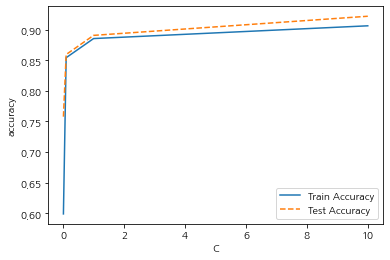

In [7]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

### 모델 Parameter 조정 결과 - Cost
- Leaf 개수가 40개 일때, test 정확도가 가장 높았으므로 40으로 설정한다.

## 모델 Parameter 조정 - Gamma

In [8]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [10 ** gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.1, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

# Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.7578
1,0.10,0.599,0.7578
2,1.00,0.599,0.7578
3,10.00,0.599,0.7578


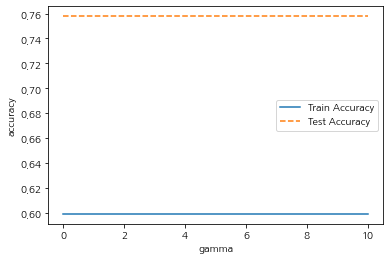

In [9]:
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

### 모델 Parameter 조정 결과 - Gamma
- gamma가 변해도 TestAccuracy의 값은 변하지 않으므로, 최소값인 0.01을 선택한다.

## Scale 변환

In [10]:
# 변수명 저장
v_feature_names = df_train_x.columns

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x_dummy)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_names)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [11]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
train data Y size : (128, 30)


In [12]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)


# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.961


### Scale 변환 결과
- SVM은 margin을 최대화하는 최적의 결정경계를 구하는 모델로, 데이터 간의 거리를 계산하여 margin을 구하기 때문에 데이터 간 표준화를 시켜주는게 성능향상에 좋다.
- 실제로 Scale을 변환한 결과 score가 89.1에서 96.1로 대폭 상승한 것을 알 수 있다.
- Scale을 변환하였으니, 앞서 정했던 Cost와 Gamma의 값을 재조정해야한다.

## 모델 Parameter 조정 - Cost 재조정

In [13]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_c = [10 ** c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

# C별 정확도 테이블 
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.964,0.906
2,1.00,0.995,0.961
3,10.00,1.000,0.961


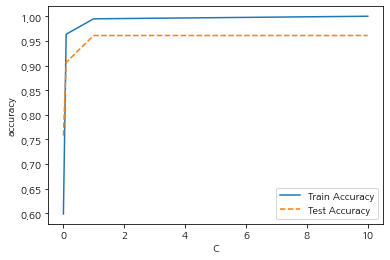

In [14]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

### 모델 Parameter 재조정 결과 - Cost
- Cost는 1.0 이상부터 TestAccuracy에 변화가 없으므로, 1을 선택한다.

## 모델 Parameter 재조정 - Gamma

In [15]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [10 ** gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

# Gamma별 정확도 테이블 
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.995,0.938
1,0.10,1.000,0.922
2,1.00,1.000,0.773
3,10.00,1.000,0.766


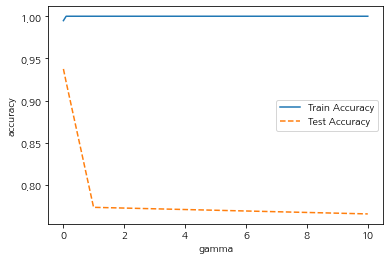

In [16]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

### 모델 Parameter 재조정 결과 - Gamma
- Gamma는 0.01 이후로 TestAccuracy의 값이 감소하므로 0.01을 선택한다.

## 채택한 파라미터로 모델 생성하기
- C : 1
- Gamma : 0.01

In [17]:
# 최종 모델
svc_final = SVC(gamma = 0.01, C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.995
Accuracy on test set: 0.938

Confusion matrix: 
[[29  2]
 [ 6 91]]
              precision    recall  f1-score   support

           0      0.829     0.935     0.879        31
           1      0.978     0.938     0.958        97

    accuracy                          0.938       128
   macro avg      0.904     0.937     0.918       128
weighted avg      0.942     0.938     0.939       128



In [18]:
estimator = SVC(random_state = 1234)

# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,
              "gamma": para_gamma}

# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=10, gamma=0.01, random_state=1234)

best parameter: 
{'C': 10, 'gamma': 0.01}

best score: 
0.989


## <span style="color:red">결론</span>
- "유방암" 데이터에 대해서 서포트 벡터 머신 모델을 생성하고, 범주를 예측해보았다.
- 우선, Hyper-parameter를 수정해나가며 모델의 정확도를 확인한 결과 다음과 같은 결과를 얻을 수 있었다.
    - 생성모델의 Train 데이터에 대한 정확도 : 99.5%
    - 생성모델의 Test 데이터에 대한 정확도 : 93.8%
- 반면에, Grid Search 방법을 통해 적절한 파라미터의 값을 통해 찾은 결과 다음과 같은 결과를 얻을 수 있었다.
    - Grid Search를 통해 찾은 정확도 : 98.9%
- 일일이 변경하며 도출한 하이퍼 파라미터보다 Grid Search를 통해 찾아낸 파라미터의 성능이 더 좋은 것을 알 수 있지만.
  생성한 모델의 정확도도 높기에 해당 모델은 설명력이 있다고 말할 수 있다.